**Support Vector Machine**


Basic SVM with Linear Kernel

In [1]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

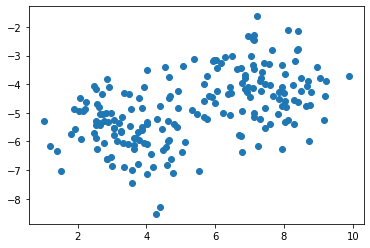

In [35]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes
X,y = make_blobs(n_samples=200,random_state=400,centers=2)

# plotting scatters
plt.scatter(X[:,0],X[:,1])
# Split data to train and test on 80-20 ratio
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=400,test_size=0.2)

In [36]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

In [37]:
# Train classifier
model = clf.fit(x_train,y_train)

In [38]:
from sklearn import metrics
# Make predictions on unseen test data
y_predict = model.predict(x_test)

#clf_predictions = #############################
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100 ))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predict))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 95.0%
Precision: 1.0
Recall: 0.9047619047619048


No handles with labels found to put in legend.


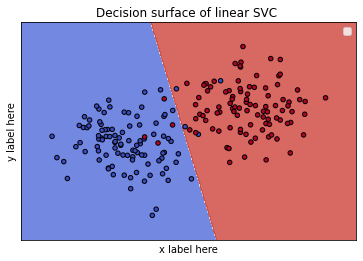

In [39]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


Part B : Breast Cancer Prediction Example

In [7]:
from pandas.core.frame import DataFrame
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()
data = DataFrame(cancer.data,columns=cancer.feature_names)
target = DataFrame(cancer.target)

In [8]:
# print the names of the 13 features
print(cancer.feature_names)
# print the label type of cancer('malignant' 'benign')
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [9]:
# print data(feature)shape
print(data.shape)

(569, 30)


In [10]:
 # print the cancer labels (0:malignant, 1:benign)
data.head()
target.head()

,0
0,0
1,0
2,0
3,0
4,0


Text(0, 0.5, 'mean smoothness')

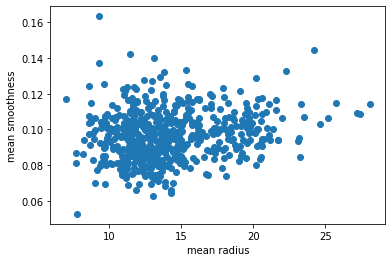

In [11]:
# plotting scatters

plt.scatter(data["mean radius"],data["mean smoothness"])
plt.xlabel("mean radius")
plt.ylabel("mean smoothness")

In [12]:
#Import svm model
from sklearn import svm
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

# compare the performance of linear, polynomial and RBF kernels.

clf = svm.SVC(kernel="linear")

print("Linear")
#Train the model using the training sets
model = clf.fit(X_train,y_train[0])
#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print()


Linear
Accuracy: 91.22807017543859%
Precision: 0.9014084507042254
Recall: 0.9552238805970149



In [13]:
clf = svm.SVC(kernel="rbf")

print("RBF")
#Train the model using the training sets
model = clf.fit(X_train,y_train[0])
#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print()

RBF
Accuracy: 87.71929824561403%
Precision: 0.8533333333333334
Recall: 0.9552238805970149



In [14]:
clf_poly = svm.SVC(kernel="poly")

print("Polynomial")
#Train the model using the training sets
model = clf.fit(X_train,y_train[0])
#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print()

Polynomial
Accuracy: 87.71929824561403%
Precision: 0.8533333333333334
Recall: 0.9552238805970149



Assignment: Try SVM classifier on MNIST dataset, compare the performance of linear, polynomial and RBF kernels.

In [15]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
from sklearn.datasets import load_digits

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)   

In [17]:
#Linear Model
linear_clf = svm.SVC(kernel='linear')
model = linear_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred)*100)

accuracy: 97.77777777777777


In [18]:
#Polynomial Model

poly_clf = svm.SVC(kernel='poly')
model = poly_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred)*100, "%")

accuracy: 98.88888888888889 %


In [19]:
#RBF Model

rbf_clf = svm.SVC(kernel='rbf')
model=rbf_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred)*100, "%")

accuracy: 98.61111111111111 %


SVM_Kernel

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap


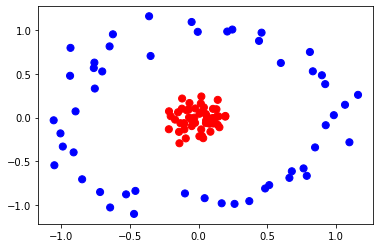

In [21]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [23]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7

In [25]:
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


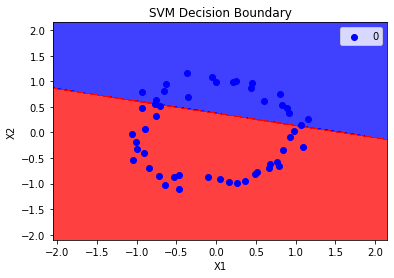

In [26]:
plot_decision_boundary(X, y, classifier)


In [27]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

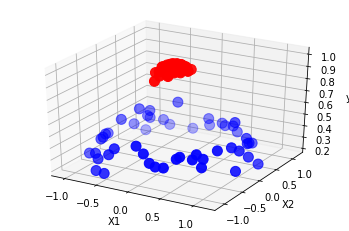

In [28]:
 plot_3d_plot(X,y)


In [29]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [30]:
 accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


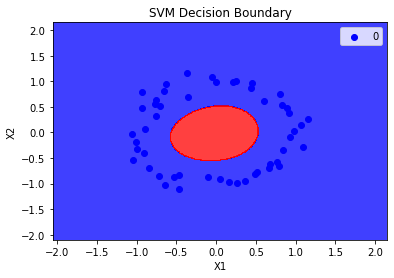

In [31]:
 plot_decision_boundary(X, y, rbf_classifier)


In [32]:
poly_classifier = SVC(kernel="poly",degree=3)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)


In [33]:
 accuracy_score(y_test, y_pred)


0.55

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


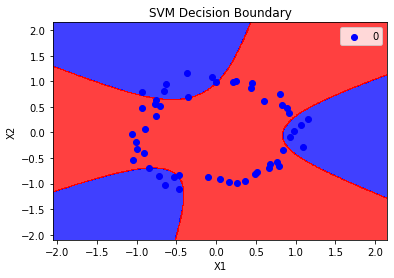

In [34]:
 plot_decision_boundary(X, y, poly_classifier)
